# Calculate the euclidean distance for each genotype

In [1]:
%run '../ipython_startup.py'

Importing commonly used libraries: 
            os, sys 
            numpy as np 
            scipy as sp 
            pandas as pd 
            matplotlib as mp 
            matplotlib.pyplot as plt
            datetime as dt 
            mclib_Python/flagging as fg

Creating project level variables: 
        MCLAB = /home/jfear/mclab 
        PROJ = /home/jfear/mclab/cegs_ase_paper 
        TODAY = 20160112

Adding ['scripts/mclib_Python', 'scripts/ase_Python'] to PYTHONPATH



In [2]:
from sklearn.neighbors import DistanceMetric
import seaborn

/home/jfear/opt/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# Import kjong's kinship matrix
kin = pd.read_csv('../../pipeline_output/similarity/kinship_matrix.csv')
kin.set_index('Unnamed: 0', inplace=True)
kin.index.name='line'

In [5]:
# Import Maren eq cis-effects
df = pd.read_csv(os.path.join(PROJ, 'pipeline_output/cis_effects/cis_line_effects.csv'))
df.set_index('fusion_id', inplace=True)

In [6]:
# Calculate the variance of each genotype
sigmaHat = df.var(axis=1)

In [8]:
# Create a standardized euclidean distance object where sigma is equal to our sigmahat
seuc = DistanceMetric.get_metric('seuclidean', V=sigmaHat)

In [7]:
# Calculate all pairwise distances
dist = seuc.pairwise(df.T)
dfDist = pd.DataFrame(dist, columns=df.columns, index=df.columns)

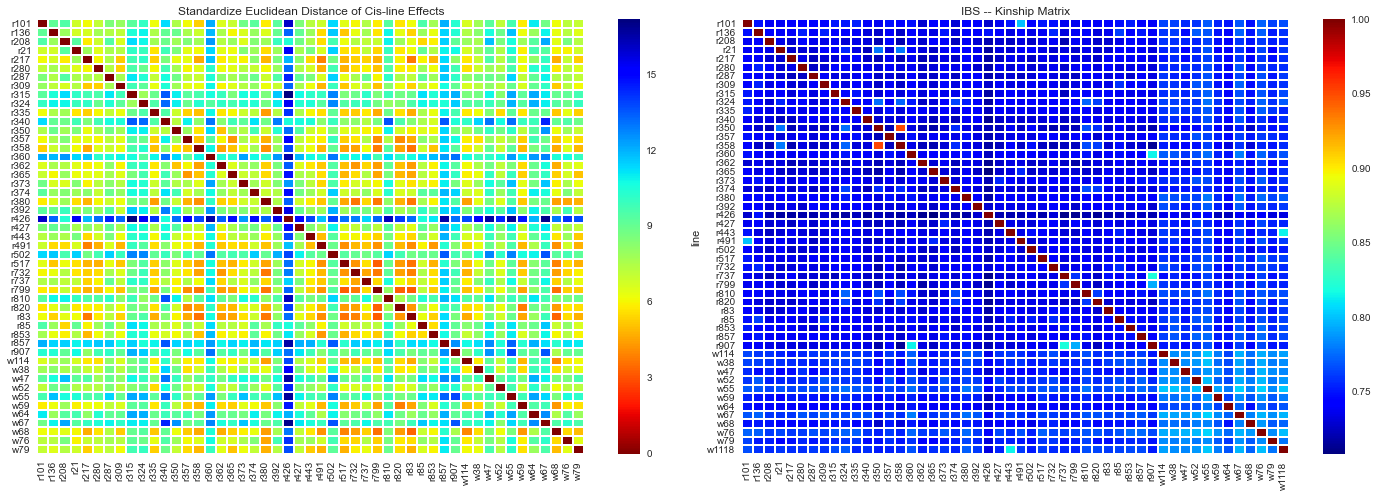

In [8]:
# Plot heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Heatmap of distance (cis-line effects)
seaborn.heatmap(dfDist, cmap='jet_r', ax=ax1)
ax1.set_title('Standardize Euclidean Distance of Cis-line Effects')

# Heatmap of kinship
seaborn.heatmap(kin.loc[df.columns.tolist() + ['w1118', ], df.columns.tolist() + ['w1118', ]], ax=ax2, cmap='jet')
_ = ax2.set_title('IBS -- Kinship Matrix')


plt.tight_layout()
fig.savefig(os.path.join(PROJ, 'pipeline_output/similarity/heatmap_std_euclidean_and_kinship.png'))

In [9]:
# Calculate distance from center
dist2 = seuc.pairwise(df.T, pd.DataFrame(df.mean(axis=1)).T)
dfDist2 = pd.DataFrame(dist2, columns=['SED_to_center'], index=df.columns)

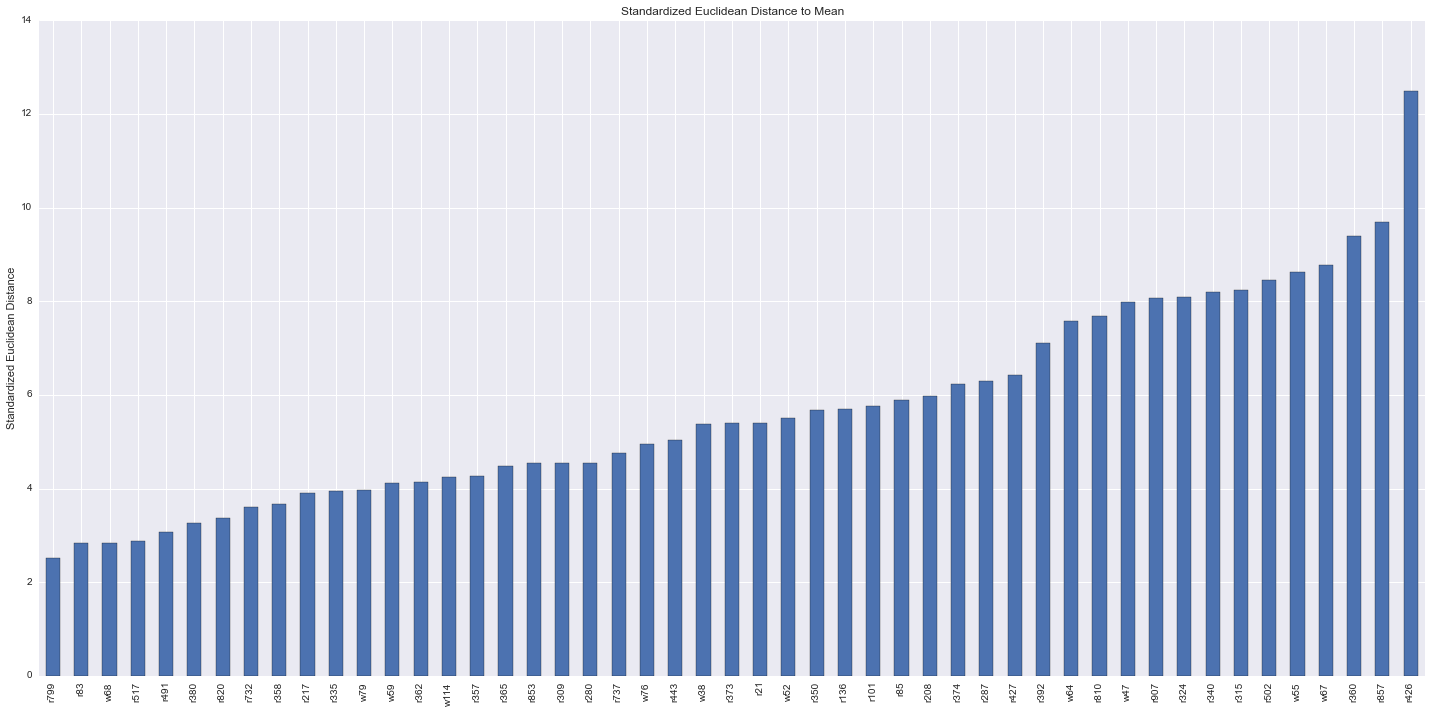

In [10]:
# Plot distance to the mean
sortDist = dfDist2.sort('SED_to_center')
ax = sortDist.plot(kind='bar', figsize=(20, 10), legend=False, title='Standardized Euclidean Distance to Mean')
ax.set_ylabel('Standardized Euclidean Distance')
fig = plt.gcf()
plt.tight_layout()
fig.savefig(os.path.join(PROJ, 'pipeline_output/similarity/bar_graph_std_euclidean_to_mean.png'))